In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# 原圖
im = cv2.imread('t.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY).astype(np.float64)
#im = im-np.mean(im)
im.shape

(512, 512)

### 算p mod

In [47]:
def Rx0(input_list):
    sum = 0
    for x in input_list:
        sum = sum + (x ** 2)
    
    return sum

def Rx1(input_list):
    sum = 0
    for x in range(len(input_list) - 1):
        sum = sum + input_list[x]*input_list[x+1]
    
    return sum


In [48]:
# x correlate
x_range = 512
y_range = 512

Rxx_x = []
for m in range(y_range):

    Rxx_tmp = []

    for count in range(x_range):

        tmp = []
        down = count-4
        up = count+5

        for n in range(down,up):
            if n >= 0 and n < x_range:
                tmp.append(im[m,n])
                
        tmp_avg=tmp-np.mean(tmp)

        Rxx_tmp.append(Rx1(tmp_avg)/(Rx0(tmp_avg)-0.5))#


    Rxx_x.append(Rxx_tmp)


#len(correlate)


In [49]:
# y correlate
x_range = 512
y_range = 512

Rxx_y = []
for m in range(x_range):

    Rxx_tmp = []

    for count in range(y_range):

        tmp = []
        down = count-4
        up = count+5

        for n in range(down,up):
            if n >= 0 and n < y_range:
                tmp.append(im[n,m])
                
        tmp_avg=tmp-np.mean(tmp)

        Rxx_tmp.append(Rx1(tmp_avg)/(Rx0(tmp_avg)-0.5))#


    Rxx_y.append(Rxx_tmp)


#len(correlate)


(512, 512)
(512, 512)
1.4814814814814803
-1.5885304659498196


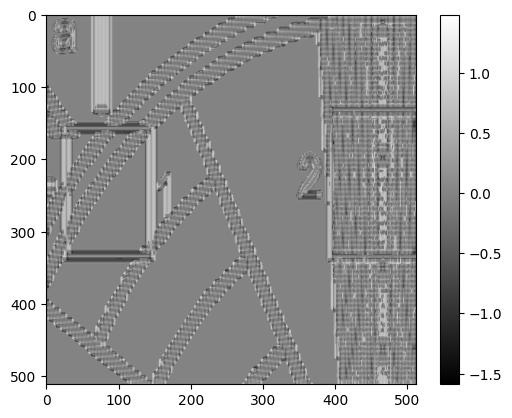

In [50]:
correlate_x = np.array(Rxx_x)
print(correlate_x.shape)
correlate_y = np.array(Rxx_y)
correlate_y = np.transpose(correlate_y)
print(correlate_y.shape)
diff = correlate_x-correlate_y
print(diff.max())
print(diff.min())
plt.imshow(diff, cmap='gray')
plt.colorbar()  
plt.show()

### LPF 實驗

In [51]:
# afterLPF = im.copy()
# x1, y1 = 0, 0  # 左上角坐标
# x2, y2 = 6, 6  # 右下角坐标
# roi = im[y1:y2, x1:x2]
# # 在ROI上应用滤波器，这里以均值滤波为例
# filtered_roi = cv2.GaussianBlur(roi, (5, 5), 1)
# # 将滤波后的ROI放回原始图像
# afterLPF[y1:y2, x1:x2] = filtered_roi

### 方法一

In [52]:
# new_im = im.copy()
# for m in range(y_range):
#     for n in range(x_range):
#         if correlate_x[m,n]>0.3:#可改
#             tmp = np.zeros((9, 9))
#             y1, y2 = m-4, m+5
#             x1, x2 = n-4, n+5
#             #取出原圖的部分範圍
#             for a in range(y1,y2):
#                 for b in range(x1,x2):
#                     #print(a,b)
#                     if a >= 0 and b >= 0 and a < y_range and b < x_range:
#                         tmp[a+4-m,b+4-n]=im[a, b]
#             #濾波
#             filtered_roi = cv2.GaussianBlur(roi, (3, 3), 3)
#             center = filtered_roi[4,4]
#             new_im[m,n]=(im[m,n]+center)/2

#         # print(tmp)
#         # print('---------------------')

                        
            


### 方法二

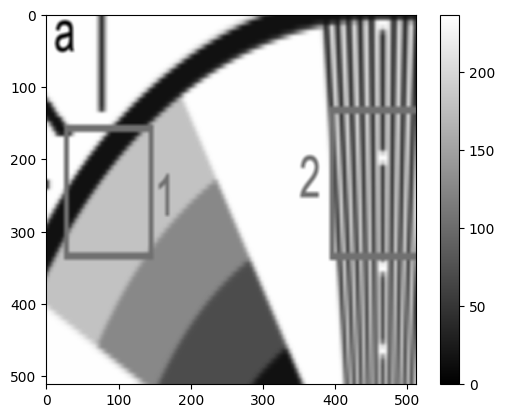

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [53]:
#整張圖片LPF
new_im = im.copy()
new_im = new_im.astype(np.float64)
#LPF = cv2.GaussianBlur(im, (5, 5), 1).astype(np.float64)
LPF = cv2.blur(im, (5, 5), 1).astype(np.float64)
plt.imshow(LPF, cmap='gray')
plt.colorbar()  
plt.show()
print(type(new_im))
print(type(LPF))


           

In [54]:

for m in range(y_range):
    for n in range(x_range):
        if correlate_x[m,n]>0 or correlate_y[m,n]>0:#可改
            new_im[m,n]=(im[m,n]+LPF[m,n])/2

### 圖

7354014.0


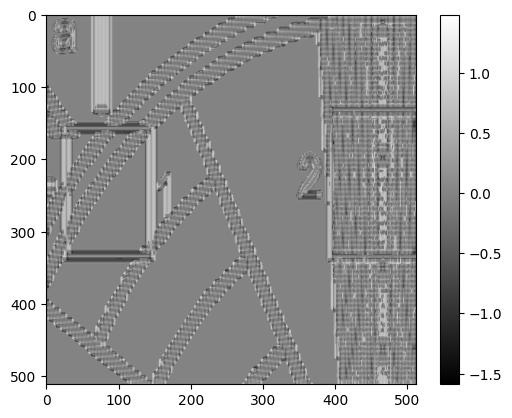

In [55]:
# 壓縮後的圖
cv2.imwrite('compression.jpg', im, [cv2.IMWRITE_JPEG_QUALITY, 50])  # 存成 jpg
compression = cv2.imread('compression.jpg')
compression = cv2.cvtColor(compression, cv2.COLOR_BGR2GRAY).astype(np.float64)
# pmod後壓縮後的圖
cv2.imwrite('compression after pmod.jpg', new_im, [cv2.IMWRITE_JPEG_QUALITY, 50])  # 存成 jpg
compression_pmod = cv2.imread('compression after pmod.jpg')
compression_pmod = cv2.cvtColor(compression_pmod, cv2.COLOR_BGR2GRAY).astype(np.float64)
# LPF的圖
cv2.imwrite('compression after LPF.jpg', LPF, [cv2.IMWRITE_JPEG_QUALITY, 50])  # 存成 jpg
compression_LPF = cv2.imread('compression after LPF.jpg')
compression_LPF = cv2.cvtColor(compression_LPF, cv2.COLOR_BGR2GRAY).astype(np.float64)
#pmod後壓縮後的圖 壓縮後的圖 比較
#不能用 太慘
diff_origin = im - compression
diff_pmod = im - compression_pmod
diff_origin = diff_origin**2
diff_pmod = diff_pmod**2
print(np.sum(diff_pmod)-np.sum(diff_origin))
#######################
plt.imshow(diff, cmap='gray')
plt.colorbar()  
plt.show()


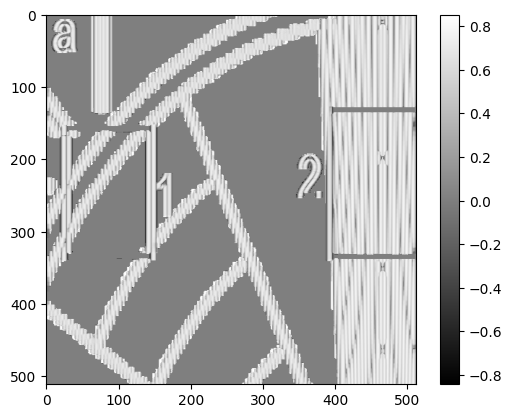

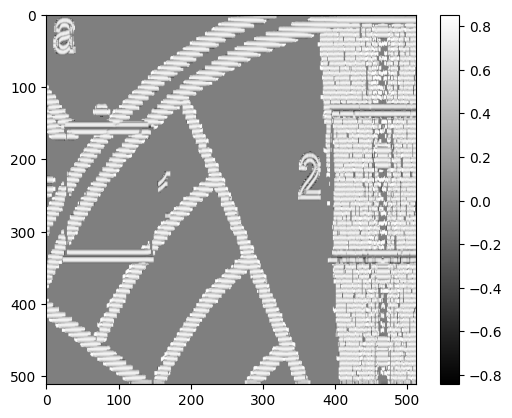

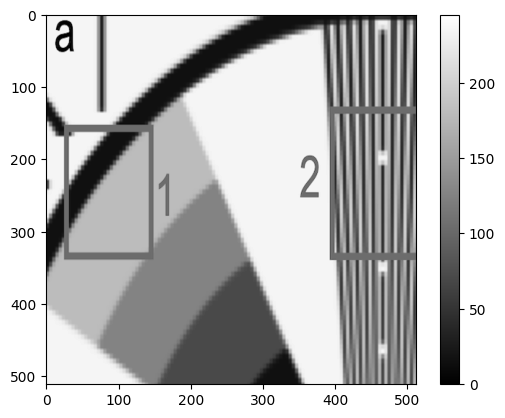

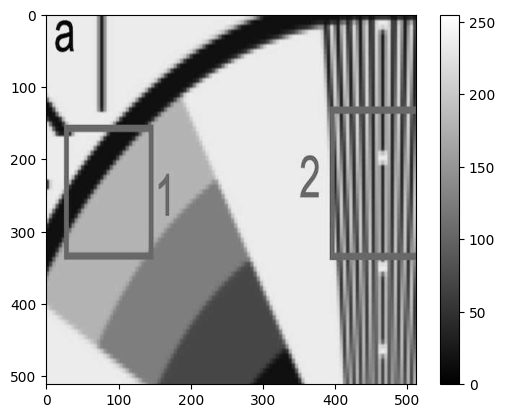

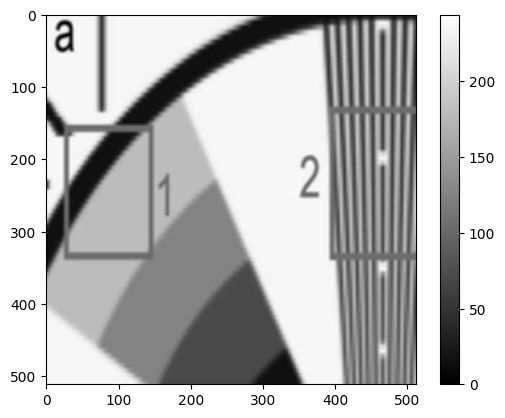

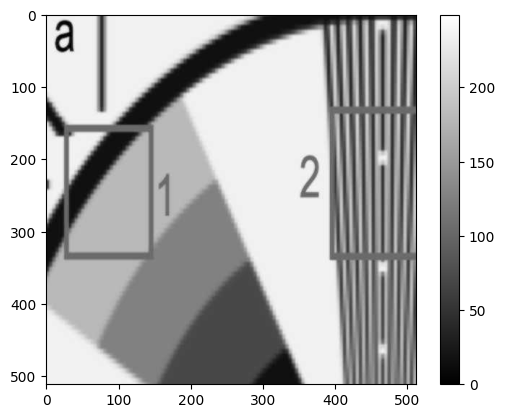

In [56]:
# p mod 圖 (x)
# p mod 代表易失真(邊界處)
plt.imshow(correlate_x, cmap='gray')
plt.colorbar()  
plt.show()
# p mod 圖 (y)
# p mod 代表易失真(邊界處)
plt.imshow(correlate_y, cmap='gray')
plt.colorbar()  
plt.show()
#原圖
plt.imshow(im, cmap='gray')
plt.colorbar()  
plt.show()
#壓縮後的圖
plt.imshow(compression, cmap='gray')
plt.colorbar()  
plt.show()
# 濾波壓縮後的圖
plt.imshow(compression_LPF, cmap='gray')
plt.colorbar()  
plt.show()
# pmod壓縮後的圖
plt.imshow(compression_pmod, cmap='gray')
plt.colorbar()  
plt.show()